<a href="https://colab.research.google.com/github/faithkane3/workshops/blob/main/workshop_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Machine Learning 101 - Classification

This tutorial is a basic intro to:
- acquiring data using the pandas `read_csv()` function.
- preparing data for modeling.
- exploring and analyzing our data.
- modeling and evaluating our data.

___

## Getting Started
1. Create your own notebook to work in.
2. Click the 'File' tab in the upper-left part of the menu bar and click 'Save a copy in Drive' to create your own copy of my Google Colab notebook that you can edit and save.
3. As you complete exercises, be sure to Save your work by either clicking on the 'File' tab in the menu bar and 'Save' or using `cmd+S`.

### Orientation:
- This notebook is composed of cells. Each cell will contain either text or Python code.
- To run the Python code cells, click the "play" button next to the cell or click your cursor inside the cell and do "Shift + Enter" on your keyboard. 
- Run the code cells in order from top to bottom, because order matters in programming and code.

### Troubleshooting
- If the notebook appears to not be working correctly, then restart this environment by going up to **Runtime** then select **Restart Runtime**. 
- If the notebook is running correctly, but you need a fresh copy of this original notebook, go [here](https://colab.research.google.com/drive1MoxkpATZRFLS3inZ38Wv0AxrBpQW5A8x?usp=sharing) and repeat the steps above in 'Getting Started'.
- Save frequently (`cmd+S`) and save often, so you have access to all of your exercise solutions!

___

# Objectives

- We are going to use the Titanic datset and a decision tree classifier to predict whether a passenger **survived**, **the dependent or target variable**, the Titanic crash using other **independent variables** in our dataset like **age**, **class**, and **sex**.
- We will practice our pandas skills as we work through the Data Science pipeline.

# Classification

### <font color=red>What is Classification?</font>

**Classification is a Supervised Machine Learning technique.** Like Regression, Classification also uses labeled data from a training dataset to learn rules for making future predictions on unseen data. However, **Classification is used to predict the category membership of the target value (label).** Examples of Classification algorithms are logistic regression, decision tree, and random forest. 

**Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.**

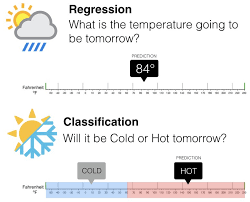

___

### <font color=orange>So What Are the Types of Classification?</font>

**Types of Classification**

>**Binary Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: {churn or not churn}, {pass or fail}, {male or female), {smoker or non-smoker}, {healthy or sick}.

>**Multiclass Classification -** This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: {A, B, or C}, {hot, warm, or cold}, or {Pythonm Java, C++, Go, or C}.

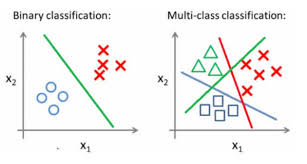

**Uses for Classification**

- Medical Diagnosis


- Spam Detection


- Credit Approval


- Targeted Marketing

___

## How Does a Decision Tree Classifier Work?

We will train our model on labeled data, our Titanic dataset for example, to find decision boundaries that it will use as decision rules on unseen data in the future. 


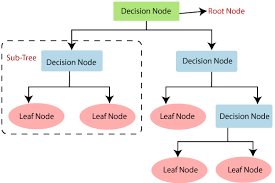

### Visual Example

![Job Offer Decision Tree Image](https://miro.medium.com/max/690/0*MxUzo0t_m7MfQBWw.png)

## Why start with a Decision Tree Classifier?

This is a great classification model to start with today because the algorithm is simple to understand and explain, and it is relateable in that we make decisions like this in the real world all the time!

___

## <font color=green>Now What?</font>

We will work through the data science pipeline focused on preparing for our Decision Tree Model. Let's do a simple end-to-end Classification Machine Learning project together!

## Data Science Pipeline
- **Plan -** This is where we form initial hypotheses and seek to understand stakeholder goals from the data.
- **Acquire -** We have to get our hands on the raw data (from databases, loading spreadsheets, scraping websites, etc...)
- **Prepare -** Data must be cleaned for analysis and modeling.
- **Explore -** Statistical testing and Visualizing relationships in the data and how the data helps us understand what we're trying to predict or discover
- **Model -** Build Machine Learning Models.
- **Present** Findings & report.

Each stage of the pipeline feeds into the next, but the process is not necessarily an iterative one. You will almost always loop back to an earlier stage of the pipeline, and more than once, as you explore and learn more about your data. Exploration will likely inform decisions you make in preparing your data for further analysis and/or modeling.

# Imports

In [1]:
import pandas as pd
import numpy as np

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=12)

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# preparing
from sklearn.model_selection import train_test_split

# modeling and evaluating
from sklearn.tree import DecisionTreeClassifier

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

# Acquire

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

### Read a csv file into a pandas DataFrame

```python
df = pd.read_csv(url)
```

In [2]:
url = 'https://raw.githubusercontent.com/faithkane3/faithkane3.github.io/master/titanic_df.csv'

titanic_df = pd.read_csv(url, index_col=0)

In [3]:
# Try the .head() method to peek at the first 5 rows of titanic_df.



In [4]:
# Try the .info() method to return the data type and non-null count of observations of titanic_df.



## Data Dictionary

|Column Name| Description|
|:-----------|:------------------------------------|
|passenger_id| A column added by Kaggle to identify each row and make submissions easier|
|survived|Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)|
|pclass|The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)|
|sex|The passenger’s sex|
|age|The passenger’s age in years|
|sibsp|The number of siblings or spouses the passenger had aboard|
|parch|The number of parents or children the passenger had aboard|
|fare|The fare the passenger paid|
|embarked|'C', 'Q', 'S'|
|class|'First', 'Second', 'Third'|
|deck|'A', 'B', 'C', 'D', 'E', 'F', 'G'|
|embark_town|The port where the passenger embarked ('Cherbourg', 'Queenstown', 'Southampton')|
|alone|0=No, 1=Yes|

#### `.describe()`

I can look at the descriptive statistics for my age column.

```python
df.column.describe()
```


In [5]:
# Use the .describe() method on the age column of titanic_df.



___

#### `.hist()`

I can check out a distribution of a single variable before I split my data.

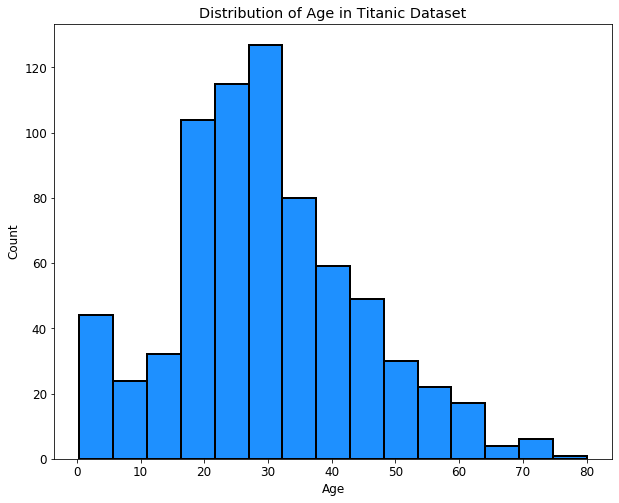

In [6]:
# Plot histogram of survived variable.

plt.hist(titanic_df.age, bins=15, color='dodgerblue', ec='black', linewidth=2)

plt.title('Distribution of Age in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [7]:
# Copy the code from above and see if you can create a histogram of the 'fare' variable.



___

#### `.value_counts()`


I can check out the frequency of unique variables in a single column or Series.


In [8]:
titanic_df.sex.value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [9]:
# Copy the code from above, but change the column name to explore another variable.



<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

# Prepare - Imputing and Encoding Focus

In this stage of the pipeline, I will start to clean my data. This might mean finding and making decisions about how I want to take care of Null values, creating new columns from exisiting columns, dropping columns I don't need, etc. I may also have to encode a string variable to an integer if I want to use that feature as a predictor or feature in my model.

<hr style="border-top: 10px groove goldenrod; margin-top: 1px; margin-bottom: 1px"></hr>

### **<font color=red>What is Imputation?</font>**

**Imputation** is the process of replacing missing data with substituted values. We have to take care of Null values before we use our data to model.

**Encoding** is when you convert a string to an integer representation making a categorical value useable in a ML model.

<font color=purple>I'll demonstrate a few different techniques to handle these tasks below.</font>

___

### **<font color=orange>So What Are They For?</font>**

You might choose to impute the mean, median, or mode of a given column to fill any holes or cells with missing data. Depending on the situation, you might just decide to drop rows or columns that have more than a certain percentage of missing values. Whatever you decide to do, you first need to inspect your dataset for Null values.

___

### **<font color=green>Now What?</font>**

Let's take a look at our data and decide what variables may need imputing or just dropped. You might also decide to create new columns in prepare.

#### `.isna()` and `.isnull()`

**I'll quickly check my dataset for missing values:**

><font color=purple>Here's a cool way to use a heatmap to visualize Null values in your dataset.</font>

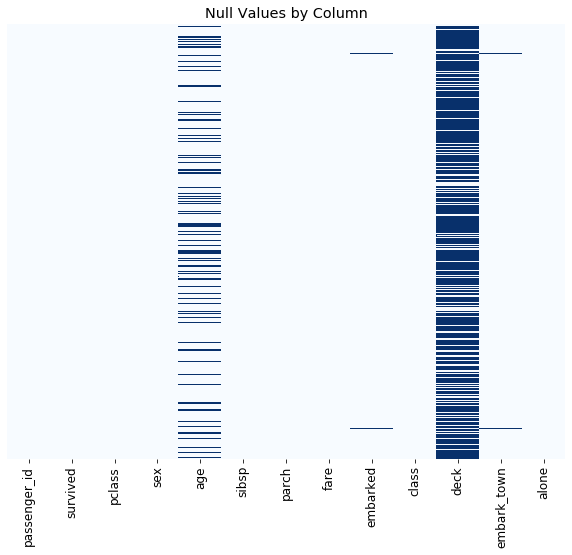

In [10]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

**Examine total missing values by column; this can help me make some decisions about imputing and dropping.**

In [11]:
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

**Examine percent of missing values by column; I can begin to decide how to handle my missing values based on this.**

In [12]:
round(titanic_df.isna().mean() * 100, 2)

passenger_id     0.00
survived         0.00
pclass           0.00
sex              0.00
age             19.87
sibsp            0.00
parch            0.00
fare             0.00
embarked         0.22
class            0.00
deck            77.22
embark_town      0.22
alone            0.00
dtype: float64

___

#### `.map()` to Create a Column

I'm adding a column here, `is_female`, and demonstrating how I could do that using `df.map()`. This is one way I can encode my `sex` feature and use it in my model later.

In [13]:
titanic_df['is_female'] = titanic_df.sex.map({'female': 1, 'male': 0})

titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,1


___

#### `.drop()`

If I'm going to drop any columns or rows, I can do it right here before the split. There are some categorical columns I'm not dropping because I want to use them in explore. I'm choosing to keep my dataframe exploration-friendly, and I can curate columns for modeling later by subsetting my datasets. I'll demonstrate this in modeling below.

In [14]:
titanic_df = titanic_df.drop(columns=['deck', 'passenger_id', 'embarked'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    int64  
 10  is_female    891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


___

### Split Your Data

- <font color=red>We need to split the dataset before we begin exploring variable relationships or performing calculations like finding the mean to impute for missing values.</font> 

- This is to prevent what is called data leakage; that is when our validate or test data is used. Remember, those datasets should be set aside to represent unseen data, so we don't want to calculate a mean, for example, from the entire dataset and impute it. We would want to calculate the mean from our train dataset and impute it into all of our datasets.

In [15]:
train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [16]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 11)
validate -> (214, 11)
test -> (179, 11)


___

**Now I can calculate the mean value for age using my train dataset and investigate relationships between variables.**

### Imputing Techniques

#### `.fillna()`

**Fill null values in a column in your datasets with a constant like 0; reassign to original dataframes.**

```python
train['col'] = train['col'].fillna(0)

validate['col'] = validate['col'].fillna(0)

test['col'] = test['col'].fillna(0)
```

___

**Fill null values in a column with the overall average from the training data.**

In [17]:
#Calculate our fill value using train dataset only. I'm using the round function to round up to 30.

avg_age = round(train.age.mean())
avg_age


30

In [18]:
# Fill null values in all of our datasets using our hardcoded value.

train.age = train.age.fillna(avg_age)

validate.age = validate.age.fillna(avg_age)

test.age = test.age.fillna(avg_age)

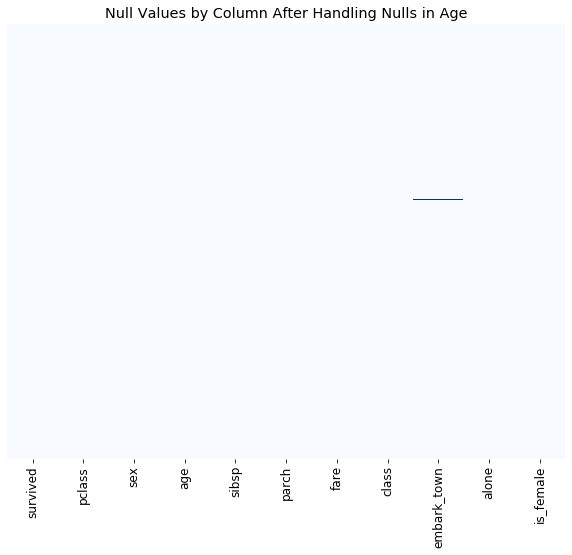

In [19]:
# Validate that our fill was successful.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column After Handling Nulls in Age')
plt.show()

___

#### What if our missing values are in a categorical column?

Here's one way you could handle this if without dropping observations.

```python
cat_mode = train['Label'].value_counts().index[0]

train['cat_column'] = train['cat_column'].fillna(cat_mode)

validate['cat_column'] = validate['cat_column'].fillna(cat_mode)

test['cat_column'] = test['cat_column'].fillna(cat_mode)
```

In [20]:
# Here I am summing up all of the Null values in the embark_town column in train; there is 1.

train['embark_town'].isnull().sum()

1

In [21]:
# Using the value_counts() method on the embark_town column. Southampton is the most common value.

train['embark_town'].value_counts()

Southampton    354
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64

In [22]:
# I can grab that first index label, Southampton, using indexing like this.

train['embark_town'].value_counts().index[0]

'Southampton'

In [23]:
# I can put it all together and save it to the variable embark_mode to fill my Nulls below.

embark_mode = train['embark_town'].value_counts().index[0]
embark_mode

'Southampton'

**Fill null values in `embark_town` in all datasets with `embark_mode` value from the train dataset; reassign to dataframes.**

In [24]:
train['embark_town'] = train['embark_town'].fillna(embark_mode)
validate['embark_town'] = validate['embark_town'].fillna(embark_mode)
test['embark_town'] = test['embark_town'].fillna(embark_mode)

In [25]:
# Validate our fill on train dataset.

train['embark_town'].isnull().sum()

0

___

# Explore

<hr style="border-top: 10px groove dodgerblue; margin-top: 1px; margin-bottom: 1px"></hr>

![image.png](https://www.cambridgemaths.org/Images/E29-exploratory-data-analysis.jpg)

### **<font color=red>What is EDA (Exploratory Data Analysis)?</font>**

Exploratory Data Analysis involves learning more about the data you're working with. One reason to perform EDA is to visualize parts of the data to better understand the correlation between the features and the target.

**The preparation for your dataset for exploration may not be the same as the prepartion of your dataset for modeling.** The requirements of Machine Learning algorithms do not always overlap with the requirements for good data visualization or exploration.

___

### **<font color=orange>So What Types of Viz are best for exploring categorical vs continuous data?</font>**

How do you decide what chart to use? Should you aggregate your data to get a better view? Are you making a comparison or showing a relationship between variables? Do you want to display the distribution or composition of your dataset? These are important questions to ask yourself when deciding on types of chart to use and data aggregations for exploration.

Read more about how to choose a chart [here](https://eazybi.com/blog/data_visualization_and_chart_types/).

![image](https://www.mymarketresearchmethods.com/wp-content/uploads/2013/01/chart-types-choosing-the-right-one.png)

___

### <font color=green>Now What?</font>

**Below is a collection of some possibilities for exploring categorical and continuous values.** 

If you want more, check out [this article](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) showing 50 amazing matplotlib visualizations with code. It's organized by purpose of visualization objective, so it's easy to navigate, too.

___

#### `sns.countplot()`

I can check out the count of unique categorical or discrete variables in a column.

In [26]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female
583,0,1,male,36.0,0,0,40.125,First,Cherbourg,1,0


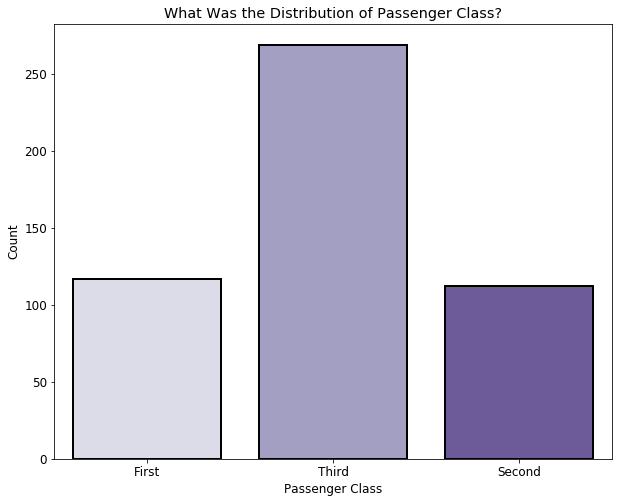

In [27]:
# Check out the count of passengers in each class.

sns.countplot(x = 'class', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('What Was the Distribution of Passenger Class?')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.show()

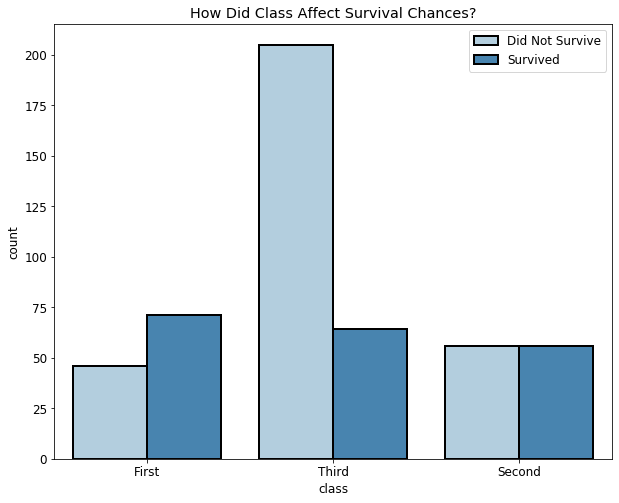

In [28]:
# Use hue to add another dimension to your visualizations.

sns.countplot(x = 'class', hue = 'survived', data=train, palette='Blues', ec='black', linewidth=2)

plt.legend(['Did Not Survive', 'Survived'])
plt.title('How Did Class Affect Survival Chances?')

plt.show()

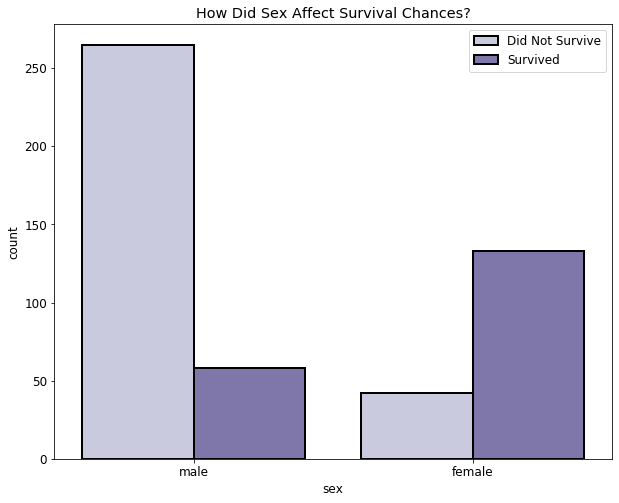

In [29]:
# Let's change class to sex.

sns.countplot(x = 'sex', hue = 'survived', data=train, palette='Purples', ec='black', linewidth=2)

plt.legend(['Did Not Survive', 'Survived'])
plt.title('How Did Sex Affect Survival Chances?')

plt.show()

___

#### `sns.swarmplot()`

Swarmplots to show Distribution of a Continuous Variable grouped by Categorical Variables.

```python
sns.swarmplot(x='categorical', y='continous', data=train , hue='categorical'  )
```

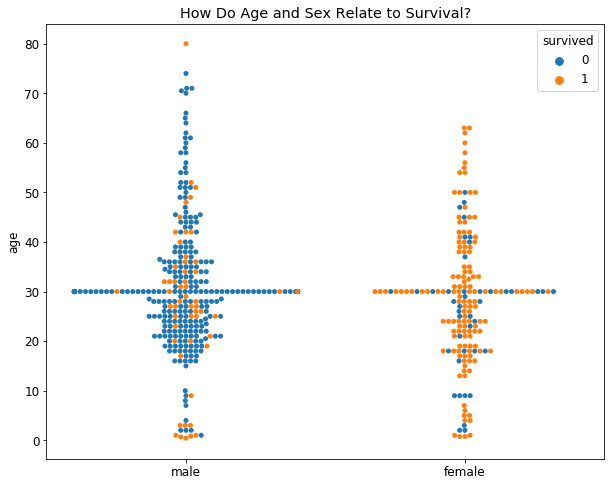

In [30]:
sns.swarmplot(x='sex', y='age', data=train , hue='survived'  )

plt.title('How Do Age and Sex Relate to Survival?')
plt.xlabel('')
plt.show()

___

## Takeaways from Exploration

You might revisit exploration as well as prepare several times during a project. Remember, the process is not necessarily linear. Exploring my data informs me of relationships between variables and can help me decide what variables I might want to use in modeling.

This was a quick trip through exploration today, but hopefully you get the idea of how helpful it is to visualize your data. I might also want to run statistical tests as a part of my EDA.

**There's some pretty cool EDA code and explanation in [this article.](https://towardsdatascience.com/exploratory-data-analysis-for-linear-regression-classification-8a27da23debc) Check it out!**

**Here are the official matplotlib [tutorials](https://matplotlib.org/3.1.1/tutorials/index.html#introductory)**

___

## Model

I'm ready to build my first model; I'm going to build a simple MVP Logistic Regression Model and see if I can beat my baseline accuracy.

**For this first iteration of modeling this dataset, I am going to choose only three independent variables as features to predict my target variable, survived.**

### <font color=red>Decision Tree Classifier</font>

**The Big Picture** 

- Classification is a supervised machine learning process. That means we train on labeled data.
- We use the training data to train the tree to find a decision boundary to use as a decision rule for future data
- Decision trees are like playing "20 Questions" with your features used to predict the target. Each question is a "Yes" or a "No". That number of questions is the depth of your tree.
- Given enough depth, decision trees are overfitting machines.

**Pros** 

- Simple to understand
- Simple to visualize
- Simple to explain the output
- Requires little data preparation
- We don't need to encode our target variable
- Perform well for a broad range of problems

**Cons**

- Can create complex trees that do not generalise well.
- Can be unstable because small variations in the data might lead to overfitting.

___

### Baseline 

**Predicting the most common case for everything.**

62% of the passengers did not survive. So, if I predict the most common outcome of survived every time, my baseline prediction will be correct 62% of the time, or in other words, **my baseline accuracy is 62%.** If my model doesn't predict correctly more than 62% of the time, my model doesn't add value.

In [31]:
# I can 

train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

___

#### Define X and y

In [32]:
# I will decide here what my X variables will be; my y is `survived`, my target.

train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,is_female
583,0,1,male,36.0,0,0,40.125,First,Cherbourg,1,0


In [33]:
# I will drop any remaining categorical features I have left.

X_train = train[['pclass', 'age', 'is_female']]
y_train = train[['survived']]

X_validate = validate[['pclass', 'age', 'is_female']]
y_validate = validate[['survived']]

X_test = test[['pclass', 'age', 'is_female']]
y_test = test[['survived']]

In [34]:
# One last check of my data; all of my features need to have numeric values. I'm good.

X_train.head(1)

,pclass,age,is_female
583,1,36.0,0


In [35]:
# This is my target variable, my label.

y_train.head(1)

,survived
583,0


___

### Create Decision Tree Model

In [36]:
# Create the model

clf = DecisionTreeClassifier(random_state=123)
clf

DecisionTreeClassifier(random_state=123)

### Fit or Train the Model

In [37]:
# Fit the model

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

**You just trained a machine learning model!**

<hr style="border-top: 10px groove darkviolet; margin-top: 1px; margin-bottom: 1px"></hr>

## Evaluate

**Is my model better than my baseline prediction accuracy of 62%?**

### Use the Model on Train Dataset

I can use my train dataset to see how accurate my model is at predicting the taget variable.

#### Accuracy Score on Train

My model's accuracy at predicting passenger survival using class, age, and sex is 90%. It beats my baseline prediction, so my model has value.

In [38]:
# Use the model to get accuracy score for train dataset

clf.score(X_train, y_train)

0.8955823293172691

In [39]:
# Format my accuracy score for readability.

print(f'Accuracy of Decision Tree classifier on training set: {round(clf.score(X_train, y_train) * 100)}%')

Accuracy of Decision Tree classifier on training set: 90%


___

### Use the Model on Validate Dataset

I can use my validate dataset to see how accurate my model is at predicting on unseen data.

#### Accuracy Score on Validate

My model's accuracy at predicting passenger survival on unseen data using class, age, and sex is 76%. This still beats my baseline, but the large drop in accuracy means that my decision tree model is overfit to the train data. I can adjust the parameters to see if I can get the accuracy on train and validate to be closer.

In [40]:
# Use my model to get accuracy score for validate dataset.

clf.score(X_validate, y_validate)

0.7616822429906542

In [41]:
# Format my accuracy score for readability.

print(f'Accuracy of Decision Tree classifier on validate set: {round(clf.score(X_validate, y_validate) * 100)}%')

Accuracy of Decision Tree classifier on validate set: 76%


___

### Takeaways from MVP Decision Tree Model Evaluation

- My accuracy drops from 90% on my train dataset to 76% on my validate dataset.

- I would now go back and probably try to adjust some of the parameters of my Decision Tree model to see if I can beat this first model, or I could try another type of classification model.

- I'm not going to test this model until I know if I can beat it with using one of the methods I described above. You will only use your test dataset one time; you will use it on your BEST model.

___

# Try it on new data!

I'm linking a fresh notebook with the code to load the Iris dataset [here](https://colab.research.google.com/drive/1EX6EjkVw7BEo85hQIwbv7TPqsr-SuGG5?usp=sharing), so you can try to run through the pipeline yourself. This dataset is a little simpler than the Titanic dataset, as well, so give it a try! Use the tools and this notebook to guide you.